Analysis on the Food Ingredients and Recipe.CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File paths
dataset_path = r"C:\Users\merit\OneDrive\Escritorio\Image_Captioning\archive\Food Ingredients and Recipe Dataset with Image Name Mapping.csv"

# Load the dataset
df = pd.read_csv(dataset_path)

In [3]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Basic dataset information
print("\nDataset Info:")
print(df.info())

# Summary statistics of numeric columns
print("\nSummary Statistics:")
print(df.describe())

Dataset Preview:
   Unnamed: 0                                              Title  \
0           0  Miso-Butter Roast Chicken With Acorn Squash Pa...   
1           1                    Crispy Salt and Pepper Potatoes   
2           2                        Thanksgiving Mac and Cheese   
3           3                 Italian Sausage and Bread Stuffing   
4           4                                       Newton's Law   

                                         Ingredients  \
0  ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...   
1  ['2 large egg whites', '1 pound new potatoes (...   
2  ['1 cup evaporated milk', '1 cup whole milk', ...   
3  ['1 (¾- to 1-pound) round Italian loaf, cut in...   
4  ['1 teaspoon dark brown sugar', '1 teaspoon ho...   

                                        Instructions  \
0  Pat chicken dry with paper towels, season all ...   
1  Preheat oven to 400°F and line a rimmed baking...   
2  Place a rack in middle of oven; preheat to 400...   
3  Preheat ov

In [4]:
# Count the number of unique recipes and ingredients
unique_recipes = df['Title'].nunique()
unique_ingredients = df['Ingredients'].nunique()
print(f"\nNumber of unique recipes: {unique_recipes}")
print(f"Number of unique ingredients: {unique_ingredients}")


Number of unique recipes: 13305
Number of unique ingredients: 13473


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load the spaCy model for NER
nlp = spacy.load('en_core_web_sm')

# Function to clean and filter ingredients using NER and stopwords removal
def filter_ingredients(ingredient):
    doc = nlp(ingredient)  # Process the text using spaCy
    valid_words = []
    
    for token in doc:
        # Keep tokens that are not stopwords and are nouns or proper nouns (likely ingredients)
        if token.text.lower() not in ENGLISH_STOP_WORDS and (token.pos_ in ['NOUN', 'PROPN']):
            valid_words.append(token.text.lower())
    
    return valid_words

# Check if 'Ingredients' column exists
if 'Ingredients' in df.columns:
    # Split ingredients and clean the data
    all_ingredients = df['Ingredients'].str.split(',').explode().str.strip()  # Split and flatten
    all_ingredients = all_ingredients.dropna()  # Remove empty entries
    all_ingredients = all_ingredients.apply(filter_ingredients).explode()  # Filter and flatten again
    
    # Count the frequency of each ingredient
    ingredient_counts = all_ingredients.value_counts()
    
    print("\nTop 10 most common ingredients:")
    print(ingredient_counts.head(10))
    
    # Horizontal bar plot for top 10 most common ingredients
    plt.figure(figsize=(10, 6))
    ingredient_counts.head(10).sort_values().plot(kind='barh', color='lightgreen')
    plt.title("Top 10 Most Common Ingredients")
    plt.xlabel("Frequency")
    plt.ylabel("Ingredient")
    plt.tight_layout()
    plt.show()
else:
    print("The column 'Ingredients' is not in the DataFrame.")


ModuleNotFoundError: No module named 'spacy'

C:\Users\merit\AppData\Local\Temp\ipykernel_52800\1262063454.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


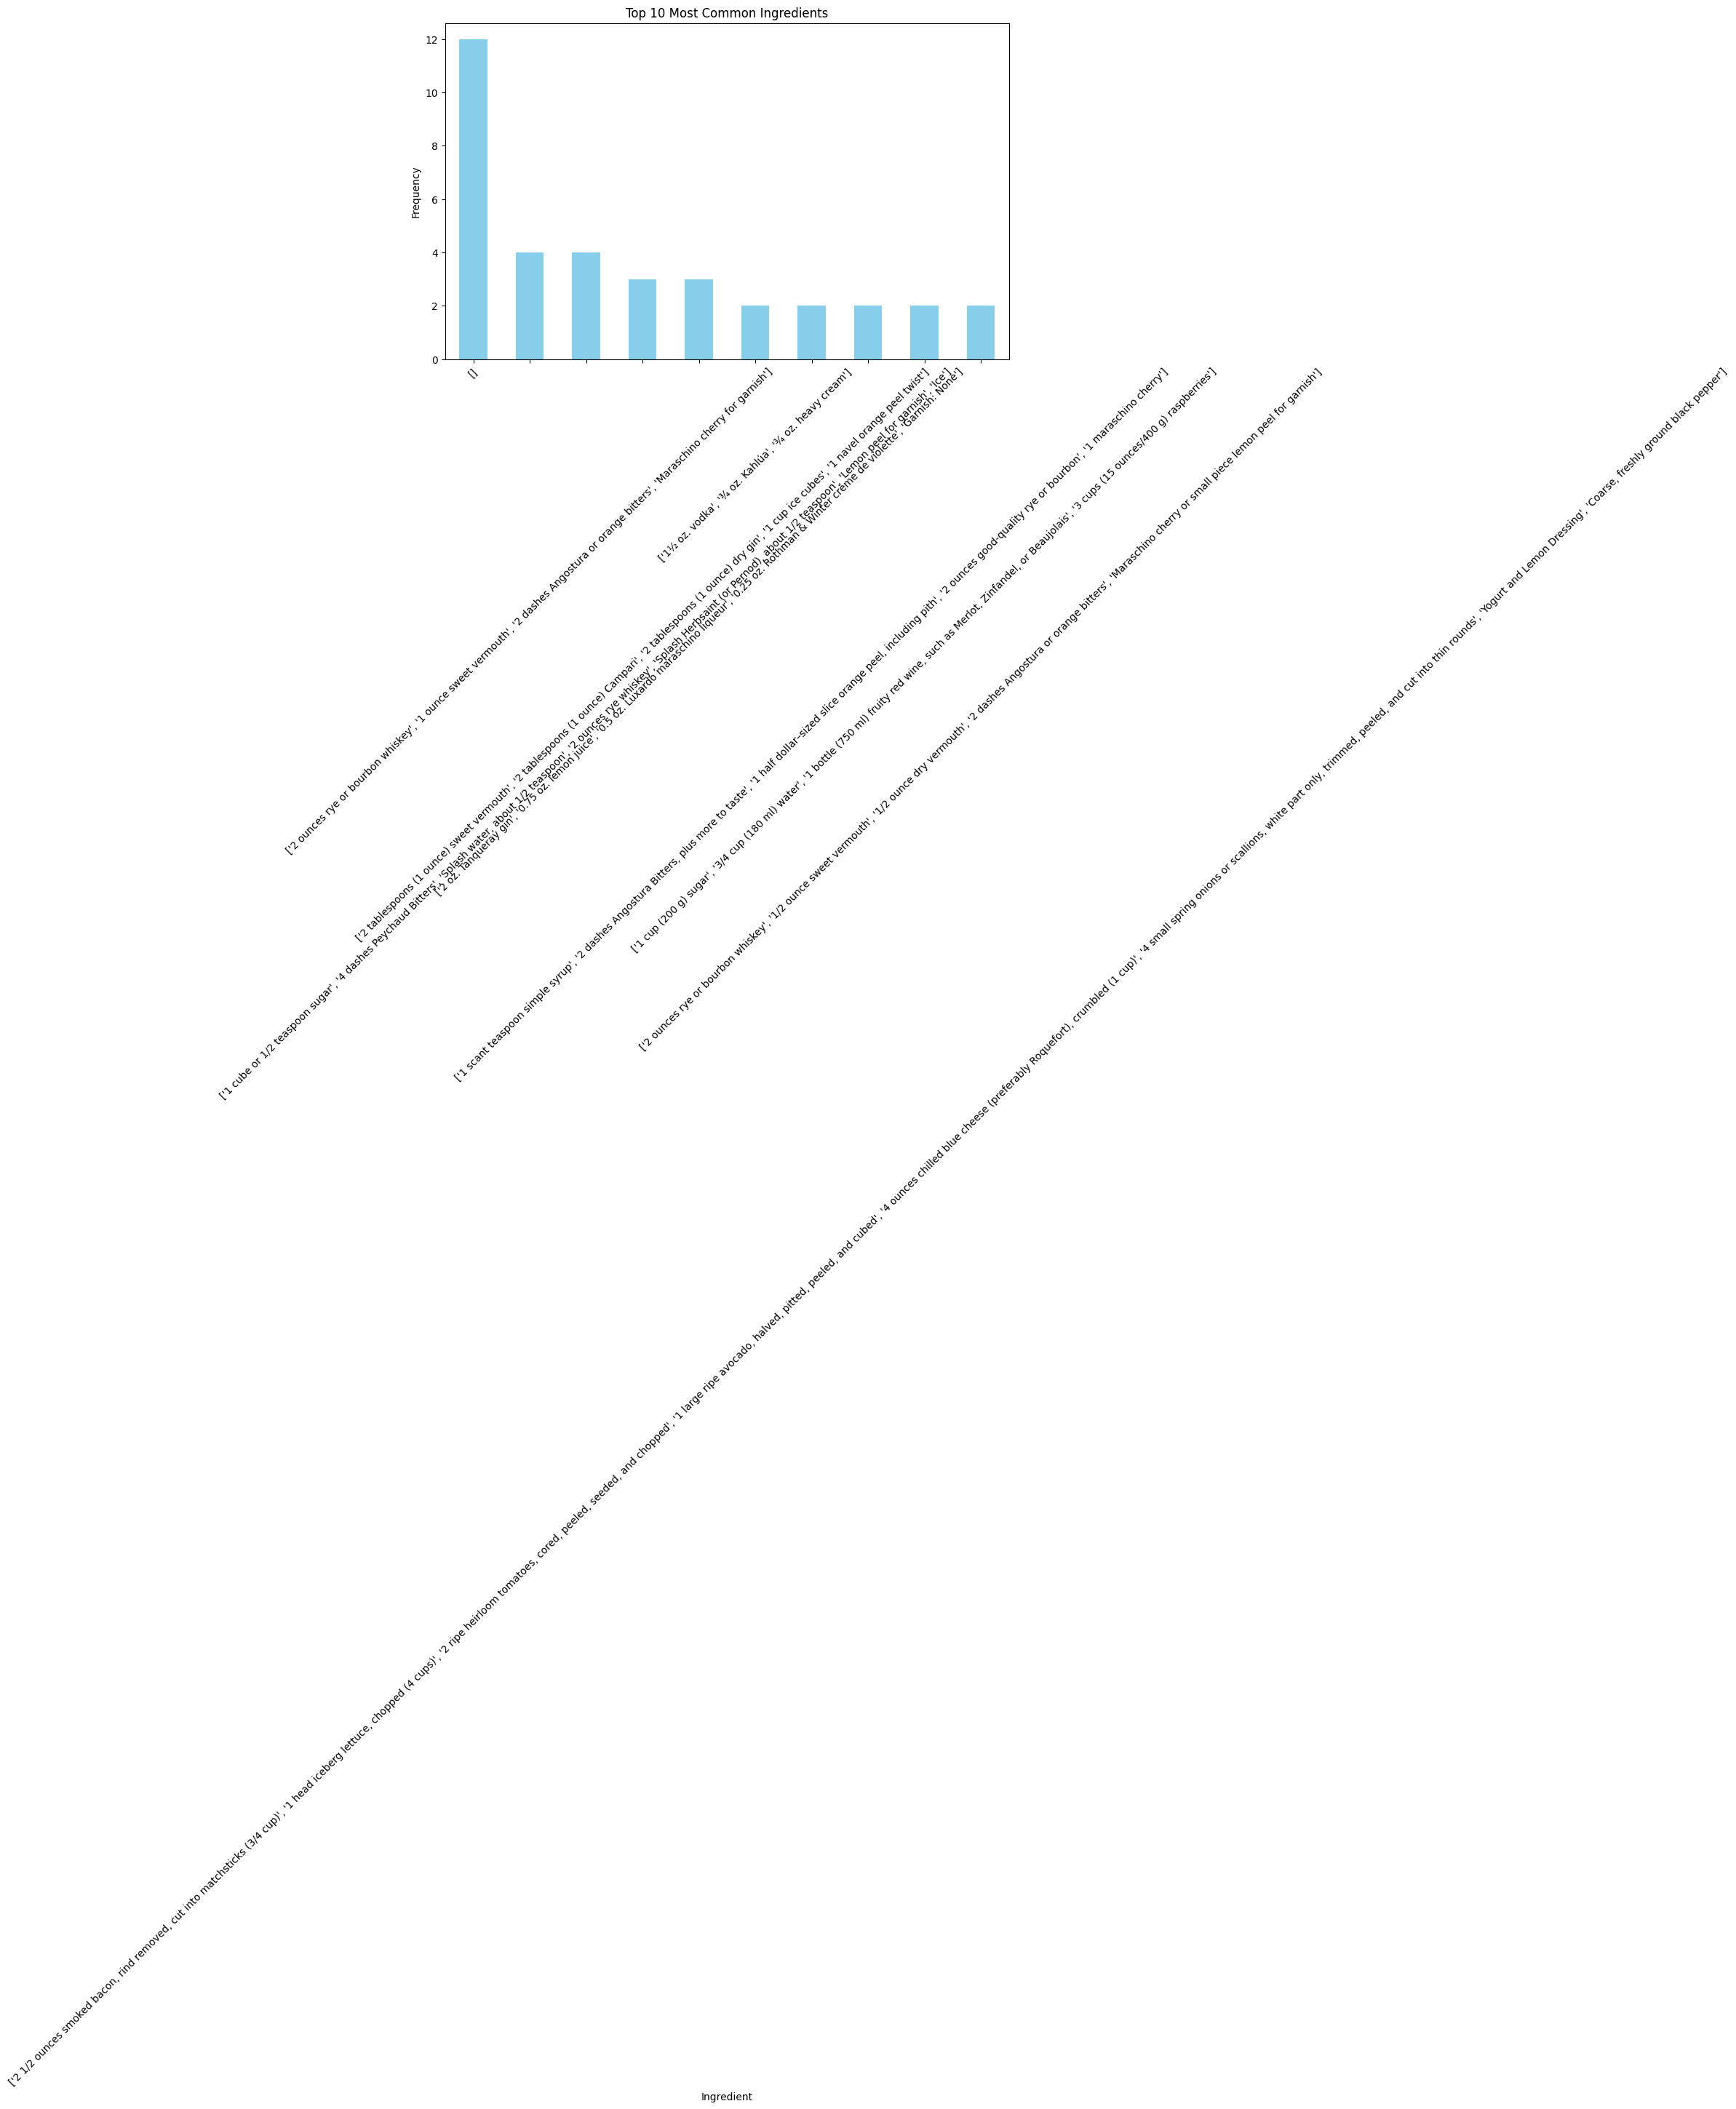


Summary of 'Number of Ingredients':
count    13501.000000
mean        14.672543
std          7.179226
min          1.000000
25%          9.000000
50%         14.000000
75%         19.000000
max         78.000000
Name: Number of Ingredients, dtype: float64


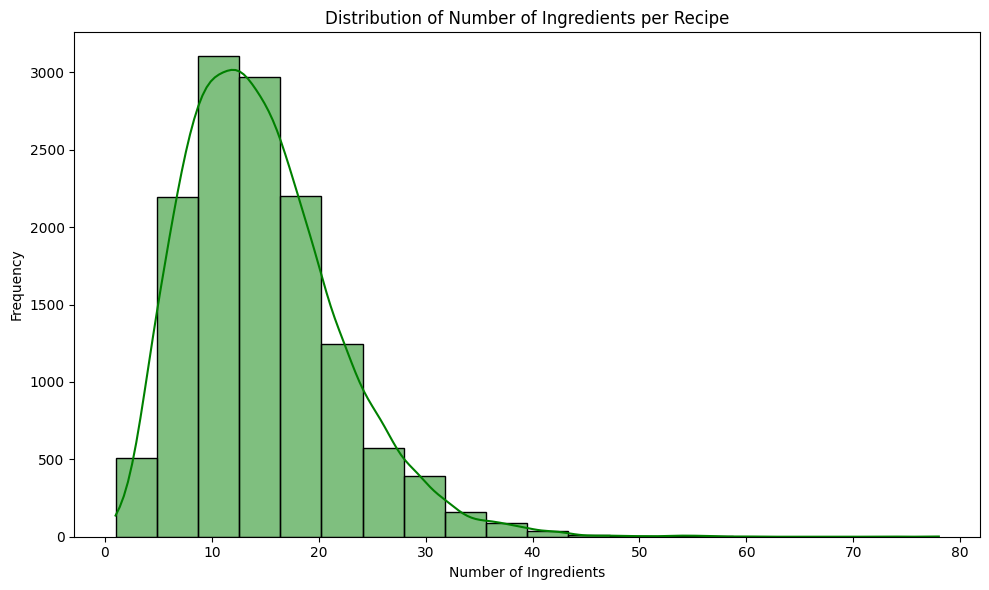

In [ ]:
# Recipe distribution (e.g., frequency of recipes with varying numbers of ingredients)
df['Number of Ingredients'] = df['Ingredients'].apply(lambda x: len(x.split(', ')))
print("\nSummary of 'Number of Ingredients':")
print(df['Number of Ingredients'].describe())

# Plotting the distribution of the number of ingredients
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Ingredients'], bins=20, kde=True, color='green')
plt.title("Distribution of Number of Ingredients per Recipe")
plt.xlabel("Number of Ingredients")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
